### SVD (Singular Value Decomposition) : 특이값 분해
- PCA와 유사한 행렬 분해 기법 이용
- PCA와의 차이 : PCA는 정방행렬(nxn)만을 고유벡터로 분해할 수 있는 반면 SVD는 행열의 크기가 달라도 분해 가능

$U*\Sigma*t(V)$
- U,V 벡터 : 특이벡터, 모든 특이벡터는 서로 직교
- $\Sigma$는 대각행렬, 대각에 위치한 값만 0이 아니고 나머지는 모두 0
- A의 차원이 mxn일 떄 U의 차원이 mxm, $\Sigma$의 차원은 mxn, t(V)의 차원은 nxn으로 분해
- $\Sigma$의 비대각인 부분과 대각원소 중 특이값이 0인 부분도 제거 후 제거된 $\Sigma$에 대응되는 U,V의 차원을 줄인 형태로 SVD 적용

In [1]:
# 랜덤 행렬의 생성 이유 : 개별 로우끼리의 의존성 제거
# 넘파이의 SVD 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U Matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix : \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U Matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [3]:
# sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [5]:
# 다시 SVD를 수행해 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value :\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value :
 [2.663 0.807 0.    0.   ]


In [6]:
# U 행렬의 경우 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [12]:
import numpy as np
from scipy.sparse.linalg import svds 
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 u,sigma,vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma 값 행렬:', Sigma)

# truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k= num_components)
print('\nTruncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # Output of truncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673

#### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- 사이킷런의 TruncatedSVD : 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 u, sigma, vt 행렬을 반환하지는 않음
- PCA 클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 주요 컴포넌트로 차원을 축소해 변환시킴
- 원본 데이터를 truncated SVD 방식으로 분해왼 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'truncatedSVD component 2')

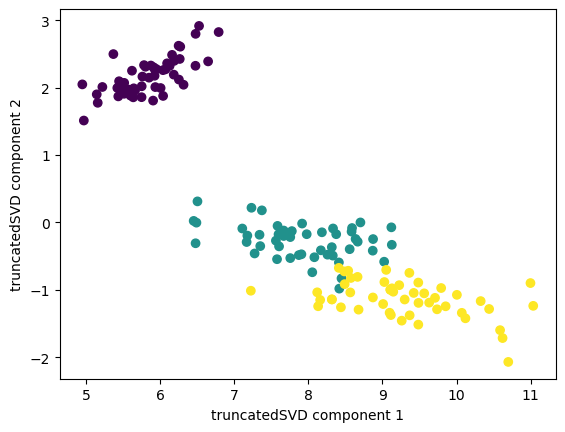

In [15]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('truncatedSVD component 1')
plt.ylabel('truncatedSVD component 2')

# truncated 변환된 붓꽃 데이터 세트
# 붓꽃 데이터를 스케일링으로 변환한 뒤 TruncatedSVD와 pca 클래스 변환 하면 두 개가 거의 동일

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

Text(0.5, 1.0, 'PCA Transformed')

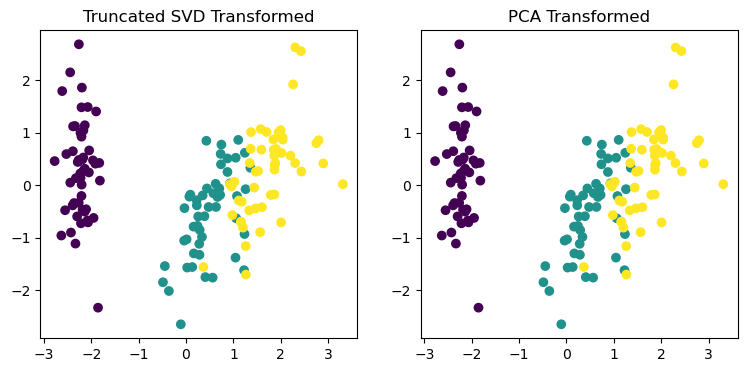

In [19]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# truncatedSVD 변환 데이터를 왼쪽에, pca 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols = 2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [23]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.322476701695682e-15
8.803721640582296e-17


### NMF (Non-Negative Matrix Factorization)
#### NMF 개요
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- 원본 행렬 내 모든 원소 값이 모두 양수라는 게 보장되면 더 간단한 두 개의 기반 양수 행렬로 분해될 수 있는 기법
- ex ) 4*6 원본 행렬 V는 4*2 행렬 W와 2*6 행렬 H로 근사해 분해돌 수 있음
- 행렬 분해를 하면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 / 작고 넓은 행렬로 분해
- 분해된 행렬은 잠재 요소를 특성으로 가짐
- SVD와 유사하게 차원 축소를 동한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용

C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF component 2')

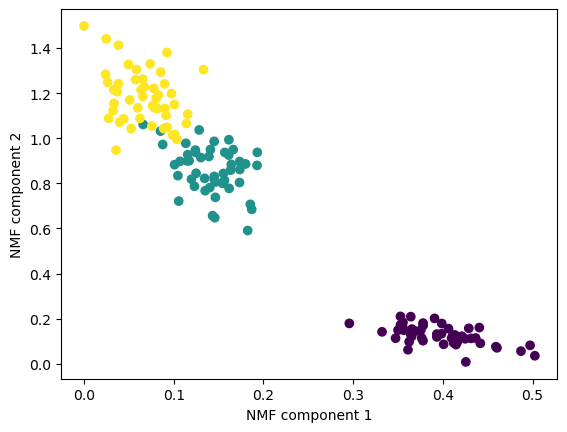

In [25]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y = iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')

### 정리
1. PCA : 입력 데이터의 변동성이 가장 큰 축을 구하고 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소
2. 고유 벡터에 이벽 데이터를 선형 변환
3. LDA : PCA와 매우 유사한 방식, 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원 축소
4. SVD와 NMF는 많은 피처 데이터를 가진 고차원 행렬을 두 개의 